In [7]:
import time
import random
import glob
import os
import sys
import numpy as np

try:
    sys.path.append(glob.glob('../carla/dist/carla-*%d.%d-%s.egg' % (
        sys.version_info.major,
        sys.version_info.minor,
        'win-amd64' if os.name == 'nt' else 'linux-x86_64'))[0])
except IndexError:
    pass

import carla

In [8]:
client = carla.Client('localhost', 2000)
client.set_timeout(5.0)
world = client.get_world()
blueprint_library = world.get_blueprint_library()

In [9]:
bp = blueprint_library.filter("model3")[0]
spawn_point = random.choice(world.get_map().get_spawn_points())
model3 = world.spawn_actor(bp, spawn_point)

In [10]:
location = model3.get_location()
print('current location: {}'.format(location))
location.x += 3
model3.set_location(location)
print('moved vehicle to location: {}'.format(location))

current location: Location(x=-145.560776, y=99.700096, z=-0.003238)
moved vehicle to location: Location(x=-142.560776, y=99.700096, z=-0.003238)


In [11]:
model3.set_autopilot()

In [14]:
import time
for i in range(10):
    print(model3.get_location())
    time.sleep(1)

Location(x=-105.776001, y=0.435519, z=-0.002574)
Location(x=-105.736229, y=0.435295, z=-0.003710)
Location(x=-103.989899, y=0.427475, z=-0.005528)
Location(x=-99.543221, y=0.404038, z=-0.004197)
Location(x=-93.888809, y=0.372302, z=-0.008313)
Location(x=-88.195831, y=0.165282, z=-0.013939)
Location(x=-82.644928, y=-0.895935, z=-0.017225)
Location(x=-78.733253, y=-4.822217, z=-0.034934)
Location(x=-77.742729, y=-10.568479, z=-0.058121)
Location(x=-77.778091, y=-16.307371, z=-0.119243)


In [15]:
camera_bp = blueprint_library.find('sensor.camera.rgb')
camera_transform = carla.Transform(carla.Location(x=1.5, z=2.4))
camera = world.spawn_actor(camera_bp, camera_transform, attach_to=model3)
camera.listen(lambda image: image.save_to_disk('model3/%06d.png' % image.frame))

In [16]:
camera.stop()

In [19]:
images = glob.glob('model3/*.png')
print(len(images))

211


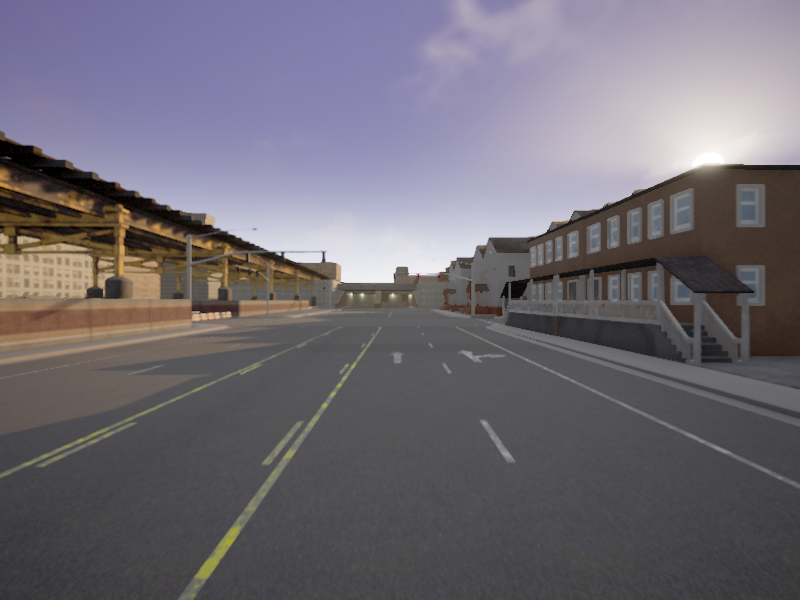

In [23]:
from IPython.display import Image
Image(filename=images[random.randint(0, len(images))]) 

In [ ]:
camera.destroy()
model3.destroy()